In [9]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from utils import *

plt.rc('font', family='NanumGothic')

In [10]:
from jupyterthemes import jtplot
jtplot.style("monokai")
plt.rc('font', family='NanumGothic')

In [11]:
df = build_dataframe('./20221111/')
df = df[df['recommendation'] >= 30]
evt = get_event_date()

In [12]:
df

,title,user,time,view,recommendation,job,category
2667,근데 이건 진짜로 억울하다,올카누스,06-19,4265,33,윈드브레이커,궁수
2659,천노 이펙트에 대한 다른 측면의 고찰(및 테섭에 보낸 개선안),나비곰,06-19,3002,93,윈드브레이커,궁수
2630,난 이해가 안됨,잊혀진영웅,06-20,2660,48,윈드브레이커,궁수
2619,원래 더 이상 분란 만들기 싫어서 그만할라했지만 난 천노 무빙 포기 못하겠다.,현둥둥,06-20,1399,30,윈드브레이커,궁수
2610,기존 개선안 이미지에 몇가지 사항을 추가해보았습니다!,뿌슝빠슝발사,06-21,720,30,윈드브레이커,궁수
...,...,...,...,...,...,...,...
116,몇년전부터 지속해온 비숍 프레이 버그있습니다,콩비,10-21,3849,72,비숍,마법사
115,버프 온오프가 급한건 아님,Yyyuuu123,10-23,1553,41,호영,도적
43,칼로스 클리어ㅓㅓㅓㅓ~,한만수,10-30,714,43,아란,전사
31,에반 유저들이 각자 다른 목소리를 내는 이유,보딱이,11-01,1890,30,에반,마법사


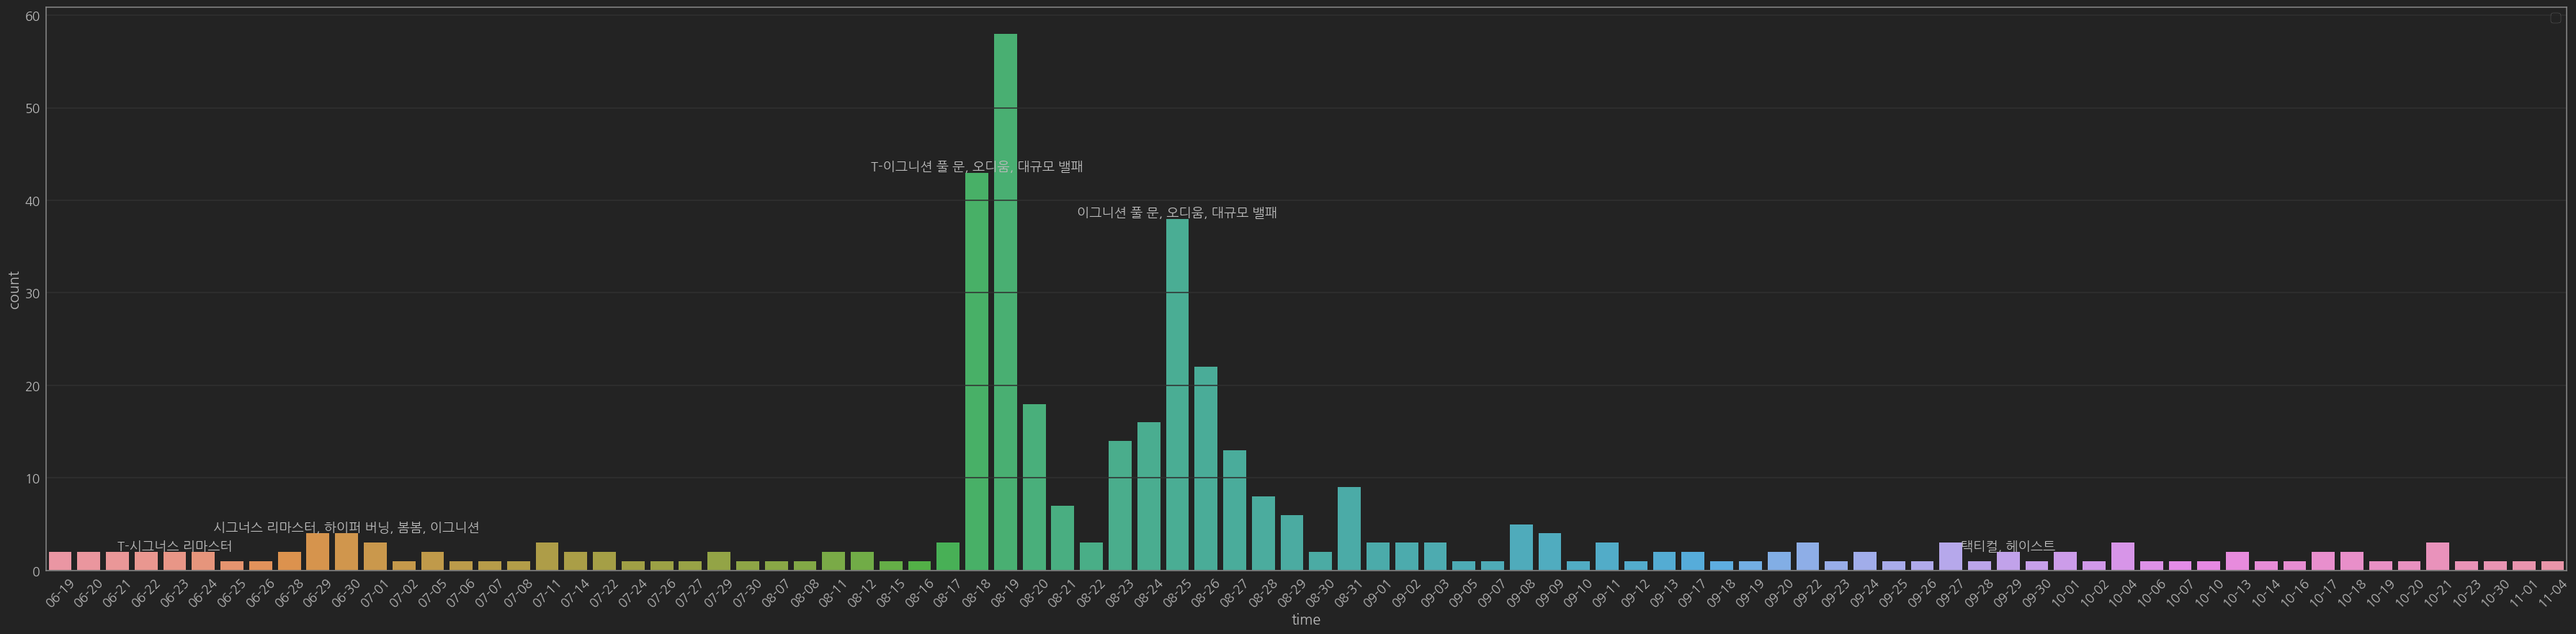

In [13]:
fig = plt.figure(figsize=(36, 9), dpi=100)
g = sns.countplot(data=df, x='time')
g.tick_params(axis='x', rotation=45)
g.legend(*g.get_legend_handles_labels(), ncol=4)
g.bar_label(g.containers[0], labels=[evt.get(txt.get_text(), "") for txt in g.get_xticklabels()])
plt.tight_layout()
plt.show()

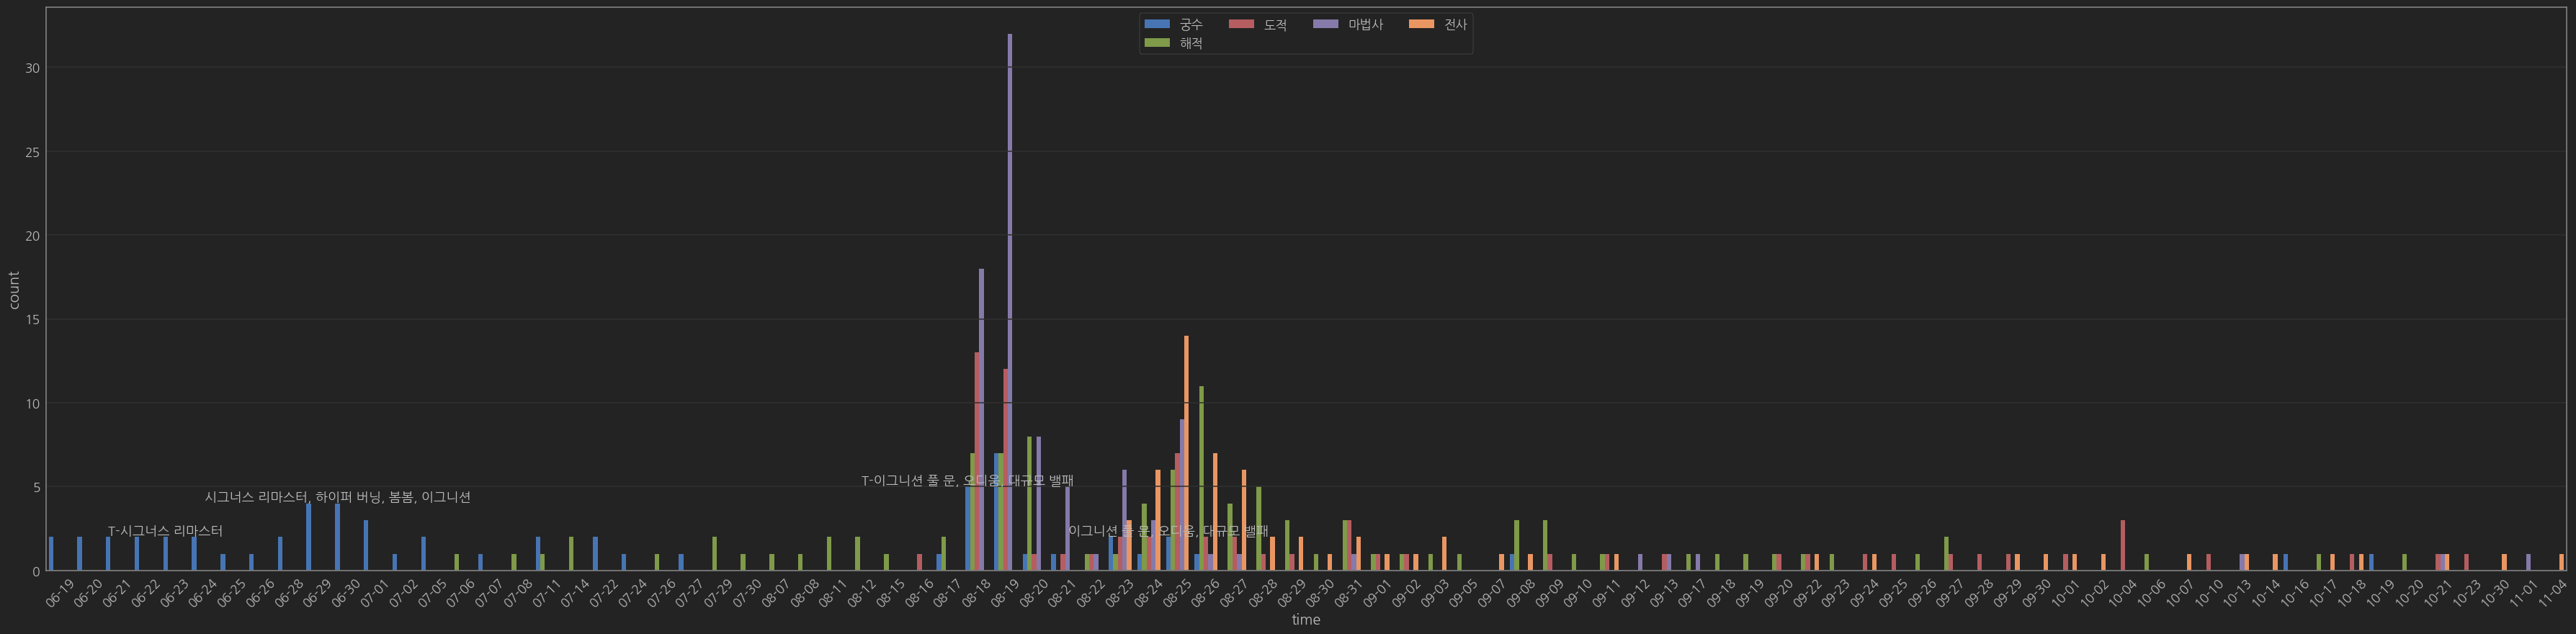

In [14]:
fig = plt.figure(figsize=(36, 9), dpi=100)
g = sns.countplot(data=df, x='time', hue='category')
g.tick_params(axis='x', rotation=45)
g.legend(*g.get_legend_handles_labels(), ncol=4)
g.bar_label(g.containers[0], labels=[evt.get(txt.get_text(), "") for txt in g.get_xticklabels()])
plt.tight_layout()
plt.show()

In [15]:
word_per_category = word_cnt_by(df, by='category')
word_per_job = word_cnt_by(df, by='job')

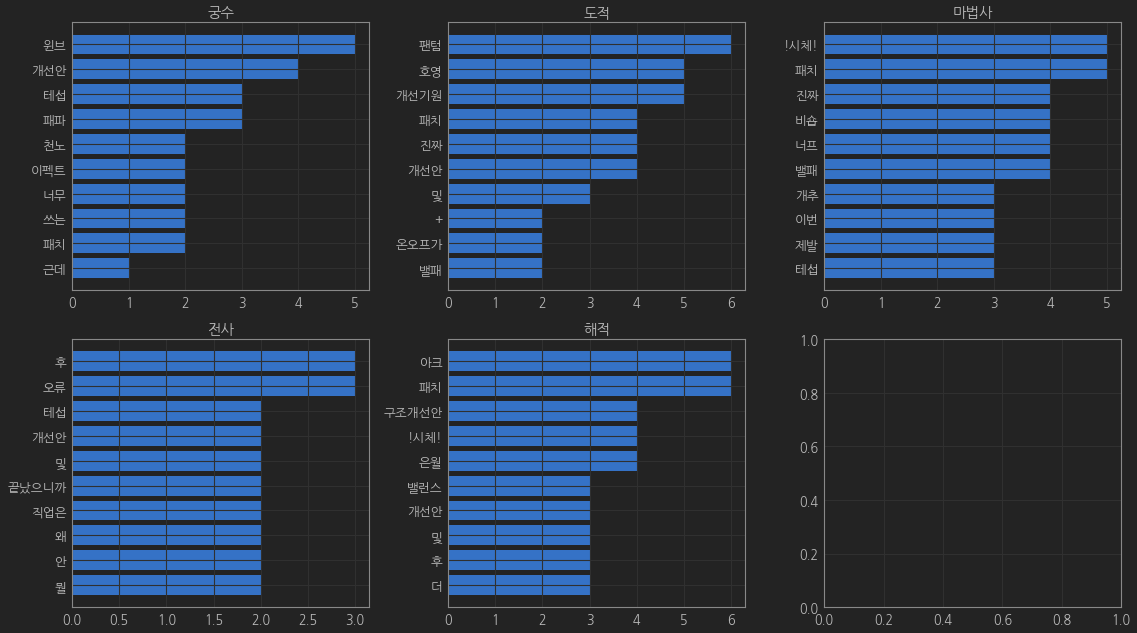

In [16]:
ncols = 3
nrows = 2
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 9))
for idx, category in enumerate(word_per_category):
    cur_ax = axs[idx // ncols][idx % ncols]
    top_10 = sorted(word_per_category[category].items(), key=lambda x: x[1], reverse=True)[:10]
    cur_ax.set_title(category)
    cur_ax.barh(*zip(*top_10[::-1]))
plt.tight_layout()
plt.show()

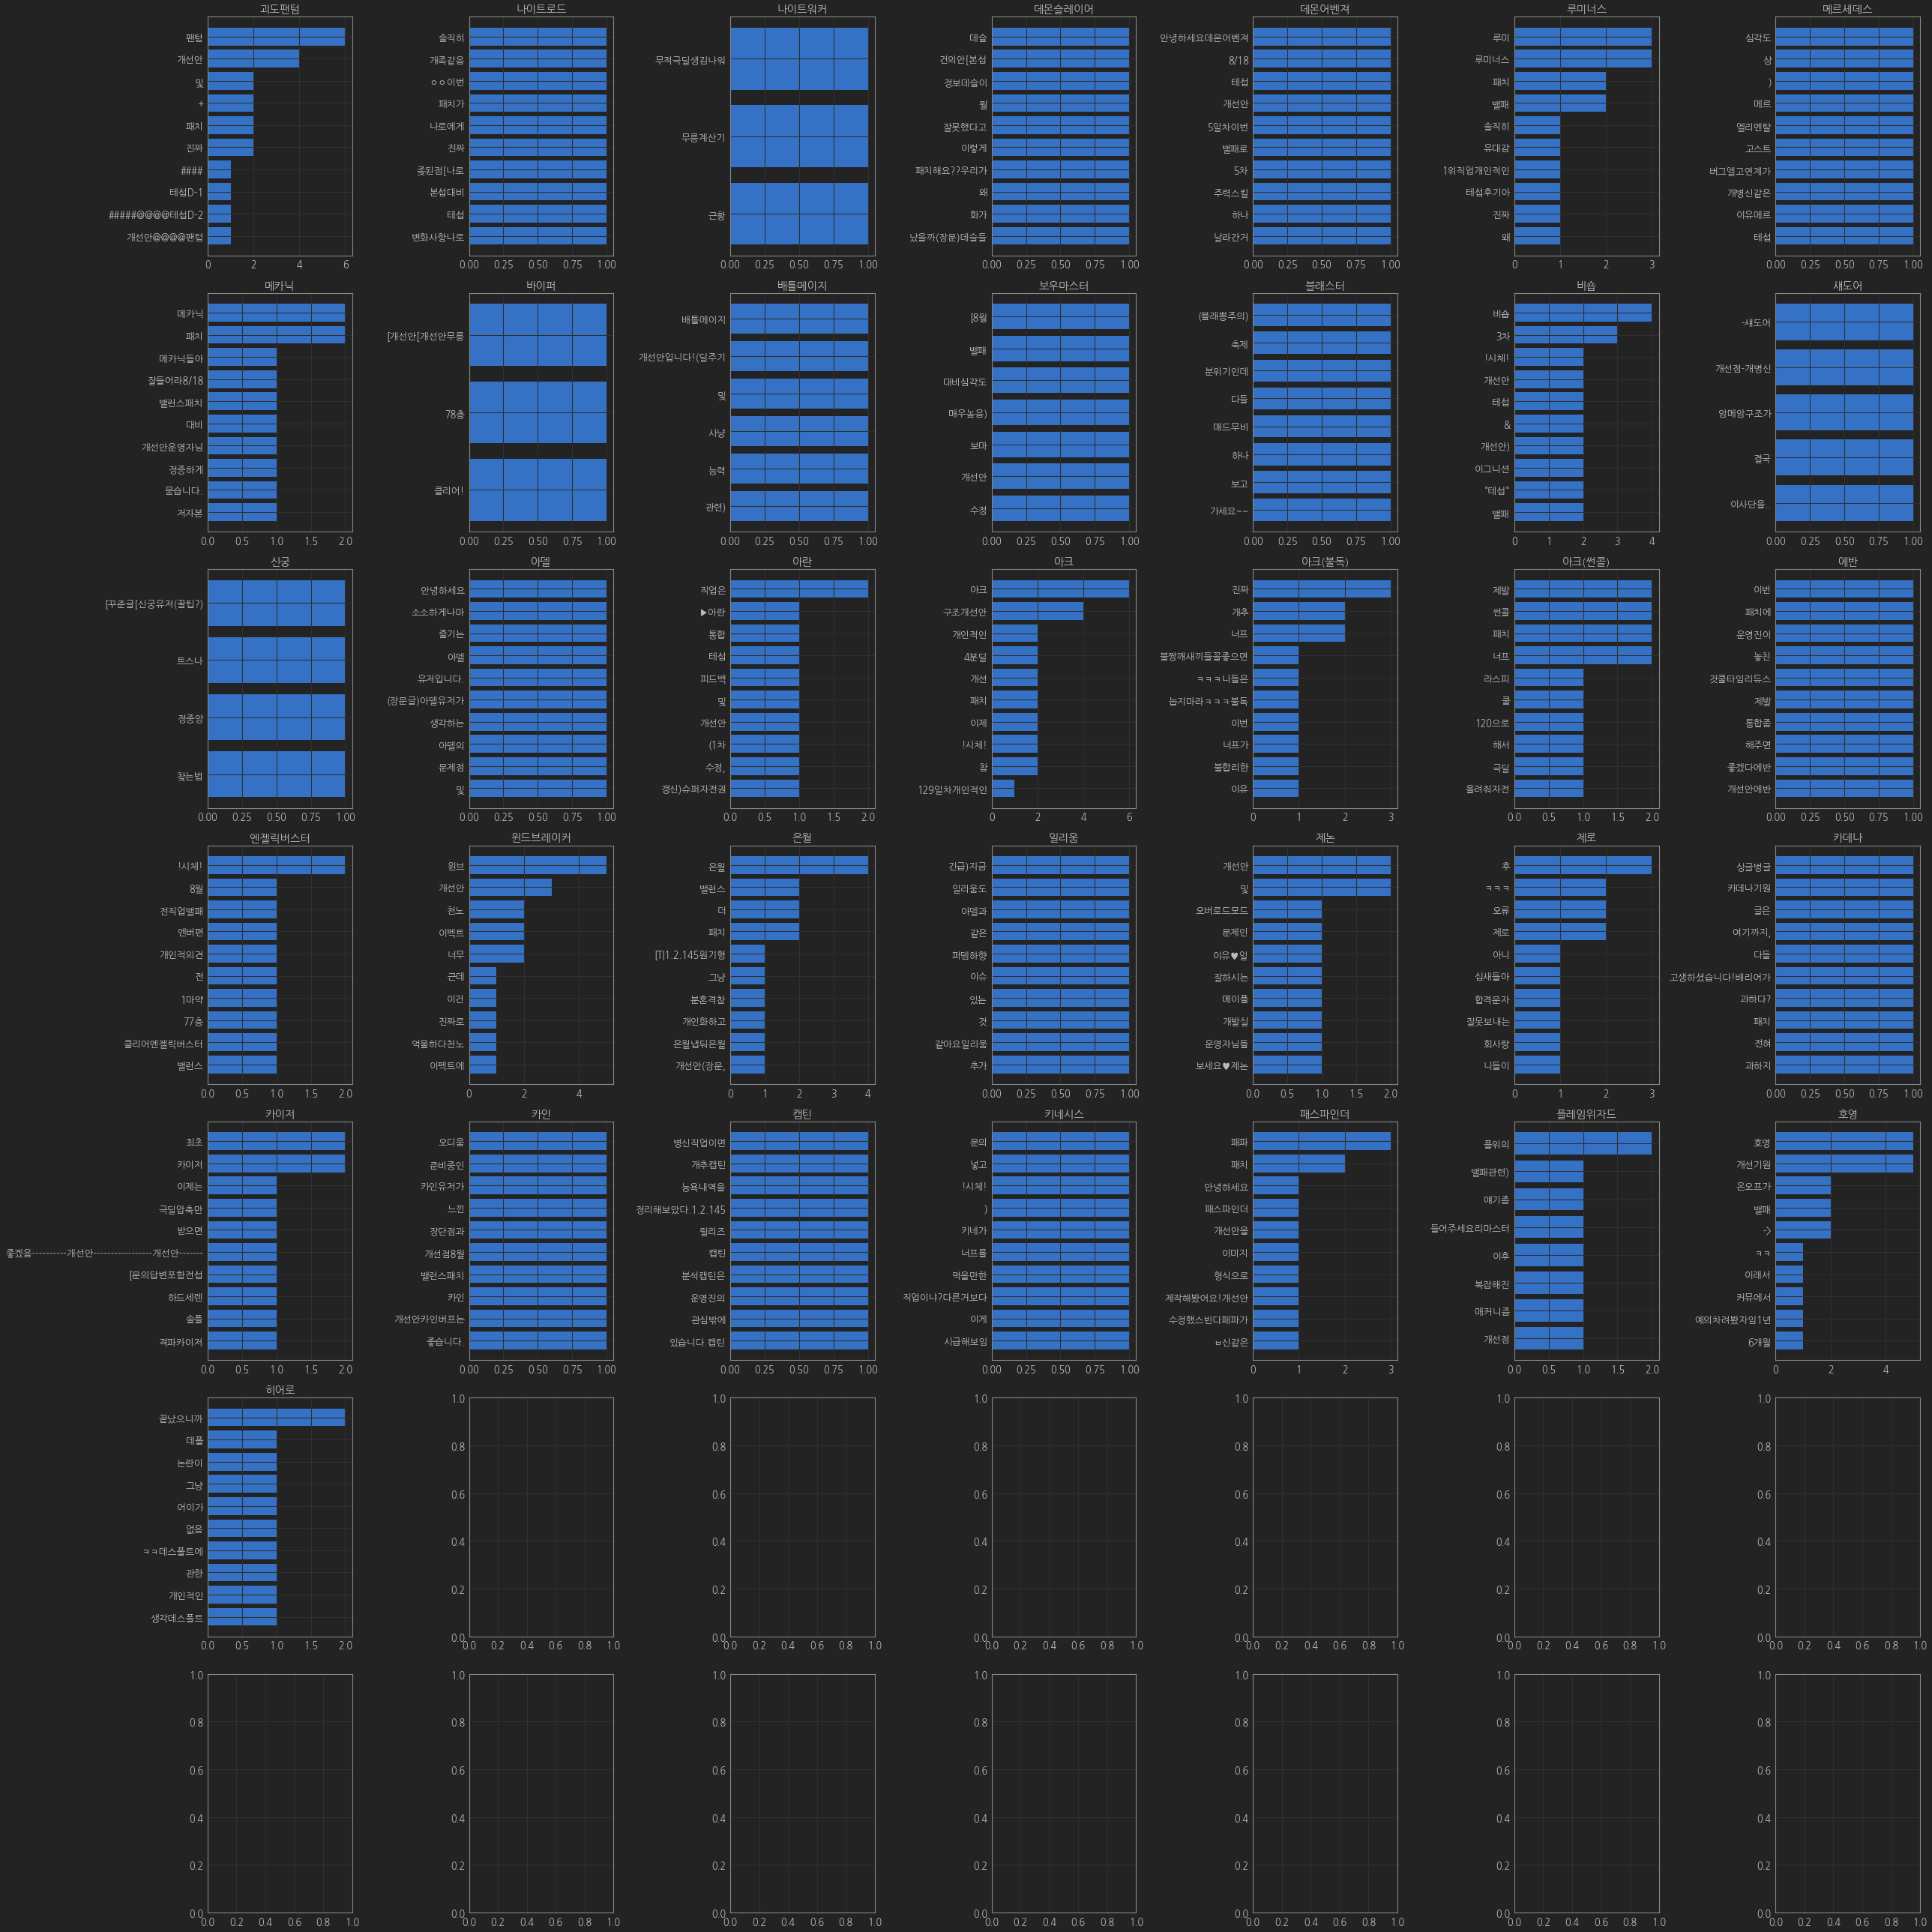

In [17]:
ncols = 7
nrows = 7
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(36, 36))
for idx, job in enumerate(word_per_job):
    cur_ax = axs[idx // ncols][idx % ncols]
    top_10 = sorted(word_per_job[job].items(), key=lambda x: x[1], reverse=True)[:10]
    cur_ax.set_title(job)
    cur_ax.barh(*zip(*top_10[::-1]))
plt.tight_layout()
plt.show()